In [1]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [17]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [18]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [19]:
# same 
"""from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)"""

'from keras.utils.np_utils import to_categorical\none_hot_train_labels = to_categorical(train_labels)\none_hot_test_labels = to_categorical(test_labels)'

In [20]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [8]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [10]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 64ms/step - loss: 2.7021 - accuracy: 0.4706 - val_loss: 1.8101 - val_accuracy: 0.6440
Epoch 2/20
16/16 [==============================] - 1s 49ms/step - loss: 1.4440 - accuracy: 0.7053 - val_loss: 1.3134 - val_accuracy: 0.7280
Epoch 3/20
16/16 [==============================] - 1s 48ms/step - loss: 1.0401 - accuracy: 0.7777 - val_loss: 1.1345 - val_accuracy: 0.7580
Epoch 4/20
16/16 [==============================] - 1s 59ms/step - loss: 0.8147 - accuracy: 0.8275 - val_loss: 1.0277 - val_accuracy: 0.7830
Epoch 5/20
16/16 [==============================] - 1s 59ms/step - loss: 0.6476 - accuracy: 0.8710 - val_loss: 0.9532 - val_accuracy: 0.8080
Epoch 6/20
16/16 [==============================] - 1s 52ms/step - loss: 0.5148 - accuracy: 0.9017 - val_loss: 0.8976 - val_accuracy: 0.8150
Epoch 7/20
16/16 [==============================] - 1s 48ms/step - loss: 0.4122 - accuracy: 0.9176 - val_loss: 0.8812 - val_accuracy: 0.8190
Epoch 8/20
16

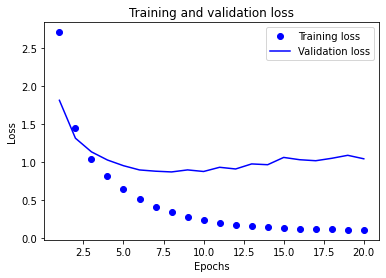

In [11]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

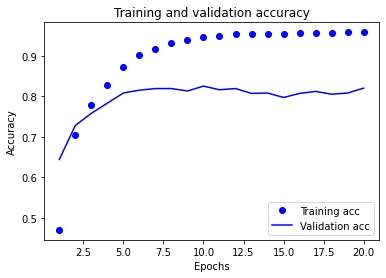

In [15]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [29]:
# Best test results are on 10th epochs
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=10,
          batch_size=512,
          validation_data=(x_val, y_val))

Epoch 1/10
16/16 [==============================] - 2s 100ms/step - loss: 2.6642 - accuracy: 0.4866 - val_loss: 1.7945 - val_accuracy: 0.6310
Epoch 2/10
16/16 [==============================] - 2s 117ms/step - loss: 1.4670 - accuracy: 0.6934 - val_loss: 1.3269 - val_accuracy: 0.7220
Epoch 3/10
16/16 [==============================] - 1s 78ms/step - loss: 1.0762 - accuracy: 0.7754 - val_loss: 1.1331 - val_accuracy: 0.7620
Epoch 4/10
16/16 [==============================] - 1s 59ms/step - loss: 0.8482 - accuracy: 0.8187 - val_loss: 1.0763 - val_accuracy: 0.7510
Epoch 5/10
16/16 [==============================] - 1s 50ms/step - loss: 0.6867 - accuracy: 0.8504 - val_loss: 0.9771 - val_accuracy: 0.7880
Epoch 6/10
16/16 [==============================] - 1s 49ms/step - loss: 0.5457 - accuracy: 0.8852 - val_loss: 0.9149 - val_accuracy: 0.8140
Epoch 7/10
16/16 [==============================] - 1s 65ms/step - loss: 0.4414 - accuracy: 0.9067 - val_loss: 0.8771 - val_accuracy: 0.8180
Epoch 8/10


In [30]:
results = model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 4ms/step - loss: 0.9901 - accuracy: 0.7845


In [31]:
results. # 78.4 % test results

[0.9901125431060791, 0.7845057845115662]

In [32]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 4ms/step


In [33]:
predictions[0].shape

(46,)

In [34]:
np.sum(predictions[0])

1.0000001

In [35]:
np.argmax(predictions[0])

3